In [1]:
import torch
import torch.nn as nn
import numpy as np 
import pandas as pd
import torch.optim as optim
import torch.nn.functional as F
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('musk_csv.csv',encoding = "UTF-8")
data.head(8)

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1
5,6,MUSK-211,211_1+14,46,-194,-145,28,-117,72,57,...,-138,-156,56,143,142,164,-67,-145,40,1
6,7,MUSK-211,211_1+15,47,-199,-106,28,-117,73,27,...,-133,-153,55,144,142,165,-68,-145,37,1
7,8,MUSK-211,211_1+16,41,-199,-101,22,-117,-6,26,...,-59,-1,50,100,135,169,-60,-135,81,1


In [3]:
data.describe()

,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
count,6598.00000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,...,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000
mean,3299.50000,58.945135,-119.128524,-73.146560,-0.628372,-103.533495,18.359806,-14.108821,-1.858290,-86.003031,...,-184.798272,-75.795696,-26.073204,64.616702,112.037739,201.760230,-47.488330,-150.259927,41.770233,0.154138
std,1904.82287,53.249007,90.813375,67.956235,80.444617,64.387559,80.593655,115.315673,90.372537,108.326676,...,107.819514,127.861271,69.727964,100.861935,72.835040,59.526751,55.069365,76.019023,94.116085,0.361108
min,1.00000,-31.000000,-199.000000,-167.000000,-114.000000,-118.000000,-183.000000,-171.000000,-225.000000,-245.000000,...,-328.000000,-219.000000,-136.000000,-120.000000,-69.000000,73.000000,-289.000000,-428.000000,-471.000000,0.000000
25%,1650.25000,37.000000,-193.000000,-137.000000,-70.000000,-117.000000,-28.000000,-159.000000,-85.000000,-217.000000,...,-272.000000,-205.000000,-70.000000,-18.000000,71.000000,166.000000,-68.000000,-179.000000,-9.000000,0.000000
50%,3299.50000,44.000000,-149.000000,-99.000000,-25.000000,-117.000000,33.000000,27.000000,19.000000,-40.000000,...,-234.000000,-131.000000,-21.000000,61.500000,107.000000,191.000000,-60.000000,-150.000000,27.000000,0.000000
75%,4948.75000,53.000000,-95.000000,-19.000000,42.000000,-116.000000,74.000000,57.000000,61.000000,-21.000000,...,-80.000000,52.000000,9.000000,149.000000,129.000000,215.000000,-45.000000,-120.000000,119.000000,0.000000
max,6598.00000,292.000000,95.000000,81.000000,161.000000,325.000000,200.000000,220.000000,320.000000,147.000000,...,94.000000,179.000000,192.000000,411.000000,355.000000,625.000000,295.000000,168.000000,367.000000,1.000000


In [5]:
data.shape

(6598, 170)

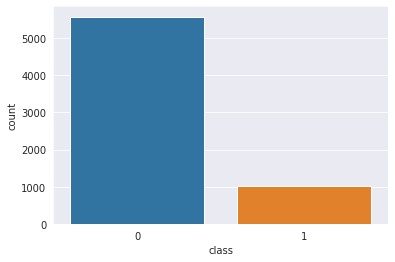

In [27]:
import seaborn as sns
sns.set_style('darkgrid')
sns.countplot(x = 'class' ,data = data , saturation=0.75,)

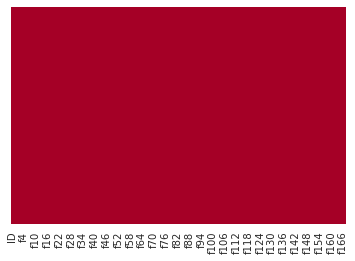

In [7]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='RdYlGn') #no null values

In [8]:
train = data.iloc[:,3:-1].values
train.astype(np.float32)

array([[  46., -108.,  -60., ...,  -50., -112.,   96.],
       [  41., -188., -145., ...,  -61., -136.,   79.],
       [  46., -194., -145., ...,  -67., -145.,   39.],
       ...,
       [  44., -102.,  -19., ...,  -66., -144.,   -6.],
       [  51., -121.,  -23., ...,  -44., -116.,  117.],
       [  51., -122.,  -23., ...,  -44., -115.,  118.]], dtype=float32)

In [9]:
test = data.iloc[:,-1].values
test.astype(np.float32)

array([1., 1., 1., ..., 0., 0., 0.], dtype=float32)

In [10]:
class Model(nn.Module):
    def __init__(self,input_dim):
        super(Model,self).__init__()
        self.layer1 =nn.Linear(input_dim,512)
        self.layer2 =nn.Linear(512,124)
        self.layer3 =nn.Linear(124,20)
        self.layer4 =nn.Linear(20,2)   
    def forward(self,x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu(self.layer3(x))
        x = F.sigmoid(self.layer4(x))
        
        return x

In [11]:
X_train,X_test,y_train,y_test = train_test_split(train,test,test_size = 0.2,random_state=42,shuffle=True)

In [12]:
model = Model(X_train.shape[1])
optimizer = optim.Adam(model.parameters(),lr = 0.01)
loss_fn = nn.CrossEntropyLoss()
epochs = 10

def print_(loss):
    print("the Loss caluculate: ",loss)

In [13]:
from torch.autograd import Variable

In [14]:
main_train,main1_train = Variable(torch.from_numpy(np.array(X_train))).float(),Variable(torch.from_numpy(np.array(y_train))).long()

for epoch in range(1,epochs+1):
    print("Epoch #",epoch)
    y_pred = model(main_train)
    loss = loss_fn(y_pred,main1_train)
    print_(loss.item())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch # 1
the Loss caluculate:  0.5550229549407959
Epoch # 2
the Loss caluculate:  0.4663270115852356


/home/madanmaram/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch # 3
the Loss caluculate:  0.4663270115852356
Epoch # 4
the Loss caluculate:  0.4663270115852356
Epoch # 5
the Loss caluculate:  0.4663270115852356
Epoch # 6
the Loss caluculate:  0.4663270115852356
Epoch # 7
the Loss caluculate:  0.4663270115852356
Epoch # 8
the Loss caluculate:  0.4663270115852356
Epoch # 9
the Loss caluculate:  0.4663270115852356
Epoch # 10
the Loss caluculate:  0.4663270115852356


In [15]:
test = Variable(torch.from_numpy(X_test)).float()
pred = model(test)

In [16]:
pred = pred.detach().numpy()

In [17]:
pred

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [18]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, np.argmax(pred, axis=1)))

[[1111    0]
 [ 209    0]]


In [19]:
from sklearn.metrics import accuracy_score


In [20]:
print ("The accuracy is", accuracy_score(y_test, np.argmax(pred, axis=1)))

The accuracy is 0.8416666666666667


In [21]:
from sklearn.metrics import recall_score

In [22]:
print ("The recall is", recall_score(y_test, np.argmax(pred, axis=1),average='weighted'))

The recall is 0.8416666666666667


In [23]:
from sklearn.metrics import precision_score

In [24]:
print ("The precision is", precision_score(y_test, np.argmax(pred, axis=1),average='weighted'))

The precision is 0.7084027777777778


/home/madanmaram/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [25]:
from sklearn.metrics import f1_score

In [26]:
print ("The f1 score is", f1_score(y_test, np.argmax(pred, axis=1),average='weighted'))

The f1 score is 0.7693061840120664


/home/madanmaram/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
